<a href="https://colab.research.google.com/github/leadeeerq/data-science/blob/main/Diamonds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Diamonds price prediction

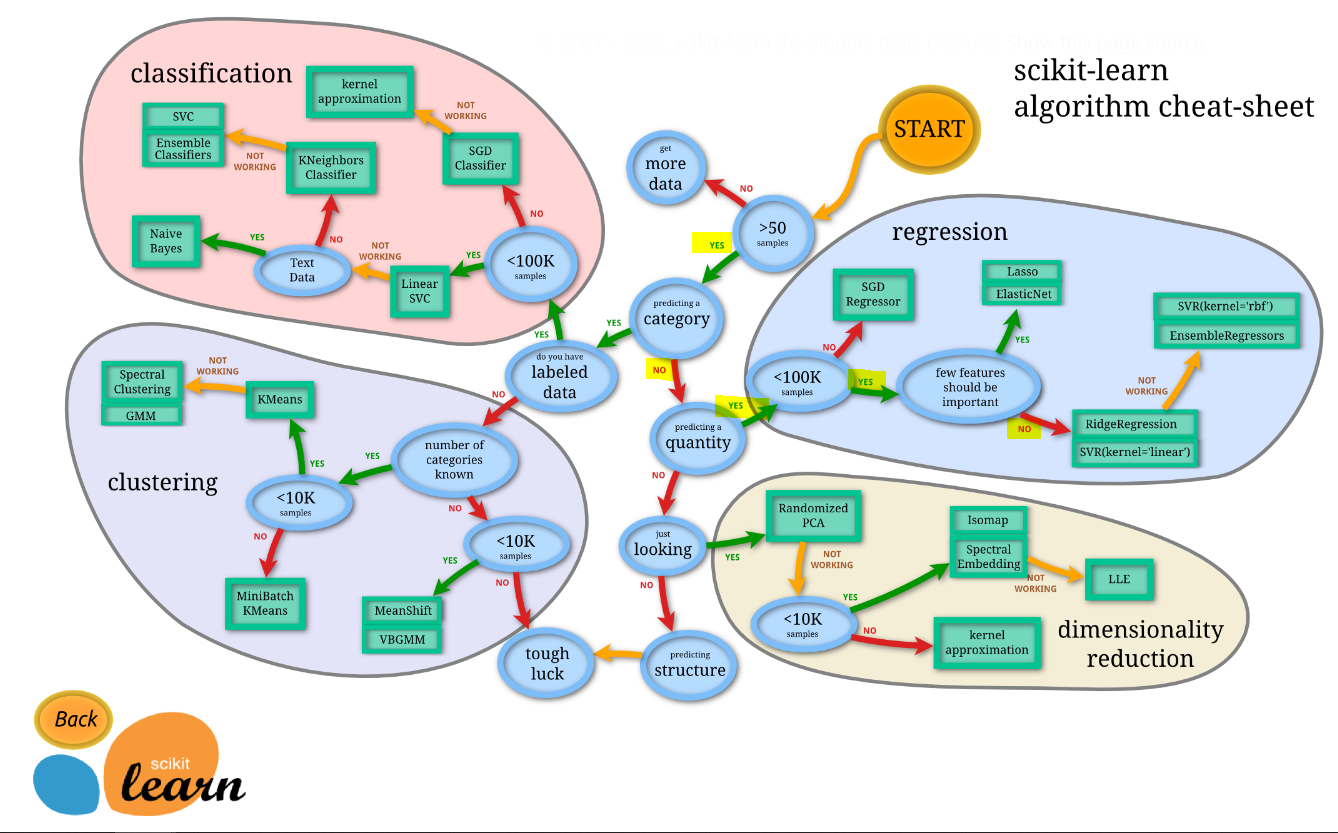

In [1]:
import pandas as pd

In [11]:
df = pd.read_csv('/content/drive/MyDrive/Projekty Data Science/Diamonds/diamonds.csv', index_col = 0)

In [4]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


##Converting categorical values to numerical

In [5]:
df['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

###pandas.Series.cat.codes - meaningless values (ideal should be higher than premium)

In [6]:
# df['cut'].astype('category').cat.codes

1        2
2        3
3        1
4        3
5        1
        ..
53936    2
53937    1
53938    4
53939    3
53940    2
Length: 53940, dtype: int8

###Conversion with the dictionary

In [12]:
cut_class_dict = {'Fair': 1, 'Good': 2, 'Very Good': 3, 'Premium': 4, 'Ideal': 5}
clarity_dict = {"I3": 1, "I2": 2, "I1": 3, "SI2": 4, "SI1": 5, "VS2": 6, "VS1": 7, "VVS2": 8, "VVS1": 9, "IF": 10, "FL": 11}
color_dict = {"J": 1,"I": 2,"H": 3,"G": 4,"F": 5,"E": 6,"D": 7}

In [13]:
df['cut'] = df['cut'].map(cut_class_dict)
df['clarity'] = df['clarity'].map(clarity_dict)
df['color'] = df['color'].map(color_dict)

In [14]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,5,6,4,61.5,55.0,326,3.95,3.98,2.43
2,0.21,4,6,5,59.8,61.0,326,3.89,3.84,2.31
3,0.23,2,6,7,56.9,65.0,327,4.05,4.07,2.31
4,0.29,4,2,6,62.4,58.0,334,4.20,4.23,2.63
5,0.31,2,1,4,63.3,58.0,335,4.34,4.35,2.75


In [19]:
df[df['price'] == df['price'].max()]

,carat,cut,color,clarity,depth,table,price,x,y,z
27750,2.29,4,2,6,60.8,60.0,18823,8.5,8.47,5.16


##Creating predictive model

In [22]:
import sklearn
from sklearn import svm, preprocessing

###Shuffling the data!

In [20]:
df = sklearn.utils.shuffle(df)

In [21]:
X = df.drop('price', axis = 1).values #drop column
y = df['price'].values

###Scaling the data

In [23]:
X = preprocessing.scale(X)
X

array([[-2.06620954e-01,  8.58890847e-02,  3.49304036e-01, ...,
         8.81147828e-02,  3.98153281e-02, -1.96592449e-01],
       [ 2.15313876e-01, -1.70527938e+00, -2.38554680e-01, ...,
         3.64468608e-01,  3.11239426e-01,  5.26102125e-01],
       [ 2.55705218e+00,  8.58890847e-02, -8.26413396e-01, ...,
         2.04042084e+00,  1.87849470e+00,  2.04234368e+00],
       ...,
       [-8.00405054e-02, -8.09695147e-01,  3.49304036e-01, ...,
         1.59431899e-01,  1.97416417e-01,  1.79429720e-03],
       [ 4.26281291e-01, -8.09695147e-01,  9.37162752e-01, ...,
         5.33846759e-01,  5.56396676e-01,  6.53636462e-01],
       [-1.22233988e-01, -1.70527938e+00, -8.26413396e-01, ...,
         1.86175818e-01,  2.41194497e-01, -1.39910521e-01]])

###Splitting the data to test and train sets

In [24]:
test_size = 200

In [25]:
X_train = X[:-test_size]
y_train = y[:-test_size]

X_test = X[-test_size:]
y_test = y[-test_size:]

In [ ]:
# import numpy as np
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

##Suppor Vector Regression classifier

In [26]:
clf = svm.SVR(kernel = 'linear')
clf.fit(X_train, y_train)

SVR(kernel='linear')

In [27]:
clf.score(X_test, y_test)

0.8431558361881865

In [31]:
for X, y in list(zip(X_test, y_test))[:20]:
  print(f'Prediction: {clf.predict([X])[0]}, actual price: {y}, diff: {y - clf.predict([X])[0]}')

Prediction: 11768.958582859663, actual price: 16439, diff: 4670.041417140337
Prediction: 3515.503855625507, actual price: 3091, diff: -424.5038556255072
Prediction: 7505.256429345756, actual price: 9253, diff: 1747.7435706542437
Prediction: 13030.786867165682, actual price: 15198, diff: 2167.2131328343185
Prediction: 6007.201514370348, actual price: 9144, diff: 3136.7984856296516
Prediction: 2911.5911942480325, actual price: 3026, diff: 114.40880575196752
Prediction: 2875.456826499666, actual price: 2400, diff: -475.456826499666
Prediction: 7986.106801957171, actual price: 8408, diff: 421.89319804282877
Prediction: 507.66673692956056, actual price: 876, diff: 368.33326307043944
Prediction: -524.1721198263031, actual price: 418, diff: 942.1721198263031
Prediction: 2651.998747547893, actual price: 2394, diff: -257.9987475478929
Prediction: 143.79229021896936, actual price: 660, diff: 516.2077097810306
Prediction: 5674.222606116403, actual price: 6146, diff: 471.77739388359714
Prediction:

In [32]:
clf = svm.SVR(kernel = 'rbf')
clf.fit(X_train, y_train)

SVR()

In [34]:
clf.score(X_test, y_test)

0.5891646867722687

In [35]:
for X, y in list(zip(X_test, y_test))[:20]:
  print(f'Prediction: {clf.predict([X])[0]}, actual price: {y}, diff: {y - clf.predict([X])[0]}')

Prediction: 5642.932308404119, actual price: 16439, diff: 10796.067691595881
Prediction: 3391.2025399245513, actual price: 3091, diff: -300.2025399245513
Prediction: 7263.8163077772915, actual price: 9253, diff: 1989.1836922227085
Prediction: 4836.9689540741165, actual price: 15198, diff: 10361.031045925884
Prediction: 5682.194782862882, actual price: 9144, diff: 3461.8052171371182
Prediction: 2527.2539587847623, actual price: 3026, diff: 498.7460412152377
Prediction: 2828.9367561591207, actual price: 2400, diff: -428.9367561591207
Prediction: 6517.5603001019945, actual price: 8408, diff: 1890.4396998980055
Prediction: 998.633609578872, actual price: 876, diff: -122.63360957887198
Prediction: 1039.6279090939634, actual price: 418, diff: -621.6279090939634
Prediction: 2332.610668224214, actual price: 2394, diff: 61.389331775786104
Prediction: 724.7202104101266, actual price: 660, diff: -64.72021041012658
Prediction: 5540.332360565978, actual price: 6146, diff: 605.667639434022
Predictio

Voting classifier (rbf kernel) gives worse result in R^2 metrics, but doesn't give negative values of the price